## Import Library

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
# import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

## Data Preprocessing

In [6]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [7]:
# rename all
df = df.rename(columns={"Luas Tanah (m2)": "Luas_Tanah", "Luas Bangunan (m2)": "Luas_Bangunan","Area Category":"Category","Nama Daerah":"Daerah","Jumlah Kamar":"Kamar","Jumlah Kamar Mandi":"Kamar_Mandi","Tingkat/Lantai ":"Lantai","Harga Penawaran (dari Owner)":"Harga","Terjual/Belum":"Terjual","Arah Hadap Rumah":"Arah_Rumah","Posisi Rumah":"Posisi_Rumah","Lebar Jalan Depan Rumah (ROW)":"ROW"})
df.head()

,Category,Daerah,Luas_Tanah,Luas_Bangunan,Kamar,Kamar_Mandi,Lantai,Harga,Terjual,Arah_Rumah,Posisi_Rumah,ROW
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [8]:
# describe data
df.describe()

,Luas_Tanah,Luas_Bangunan,Kamar,Kamar_Mandi,Lantai,Harga
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [9]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       308 non-null    object
 1   Daerah         308 non-null    object
 2   Luas_Tanah     308 non-null    int64 
 3   Luas_Bangunan  308 non-null    int64 
 4   Kamar          308 non-null    int64 
 5   Kamar_Mandi    308 non-null    int64 
 6   Lantai         308 non-null    int64 
 7   Harga          308 non-null    int64 
 8   Terjual        308 non-null    object
 9   Arah_Rumah     308 non-null    object
 10  Posisi_Rumah   308 non-null    object
 11  ROW            308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [10]:
# menghapus spasi kosong di awal dan akhir semua teks dalam kolom tersebut.
df['Daerah'] = df['Daerah'].str.strip().str.lower()

# find unique values
unique_values_dict = {col: df[col].unique() for col in df.columns}
print("--- Unique Values ---")
display(unique_values_dict)

unique_counts_series = df.nunique()
print("\n--- Counts of Unique Values (Series) ---")
display(unique_counts_series)

--- Unique Values ---


{'Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Daerah': array(['citraland', 'setro baru utara', 'kenjeran', 'gubeng', 'sawahan',
        'mulyorejo', 'tegalsari', 'tambaksari', 'kalilom lor timur',
        'jelidro manukan', 'kalilom', 'bulak cumpat barat', 'tambak wedi',
        'lebak jaya', 'simo gunung kramat timur', 'medokan ayu',
        'lebak rejo', 'medokan sawah', 'klampis ngasem',
        'medokan sawah timur', 'citraland golf avenue', 'wisata semanggi',
        'kedung klinter', 'gading indah regency', 'gunung anyar mas',
        'kutisari utara', 'mulyosari tengah', 'kapas madya',
        'bratang gede', 'citraland utara', 'lebak jaya utara',
        'mulyosari timur', 'pakuwon city', 'pakuwon city florence',
        'pantai mentari', 'royal residence', 'villa kalijudan indah',
        'sutorejo timur', 'springville residence', 'sukomanunggal',
        'surabaya pusat', 'su', 'mulyosari', 'krukah selatan',
        'm


--- Counts of Unique Values (Series) ---


Category           4
Daerah           121
Luas_Tanah       141
Luas_Bangunan    125
Kamar             10
Kamar_Mandi        9
Lantai             4
Harga            171
Terjual            1
Arah_Rumah         4
Posisi_Rumah       5
ROW                3
dtype: int64

In [11]:
# drop Terjual KARENA ISINYA HANYA BELUM DAN TIDAK ADA VALUES LAIN DI COLUMN TERSEBUT
df = df.drop('Terjual', axis=1)

#bukan lah nama daerah
df = df[df['Daerah'] != 'su']

##  Exploratory Data Analysis

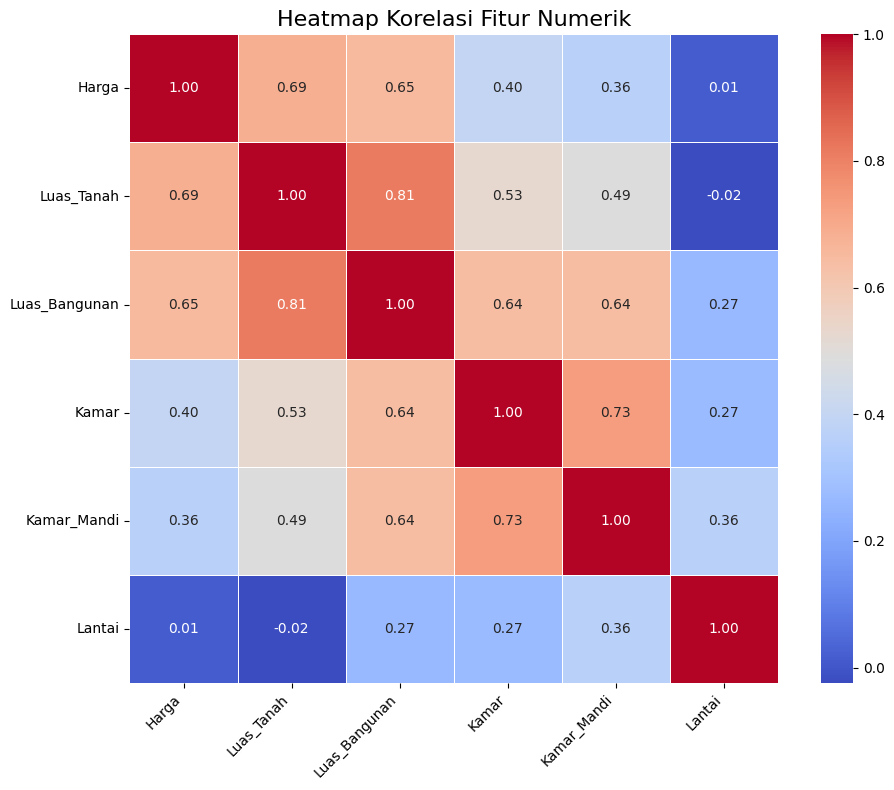

In [12]:
numerical_cols = ['Harga', 'Luas_Tanah', 'Luas_Bangunan', 'Kamar', 'Kamar_Mandi', 'Lantai']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()


### Interpretation
Faktor terpenting yang mendorong Harga adalah ukuran fisik properti. Heatmap membuktikan hal ini secara kuantitatif:

- Luas_Bangunan adalah prediktor terkuat dengan nilai korelasi positif 0.78. Ini menunjukkan hubungan dimana semakin besar bangunan, hampir pasti harganya semakin tinggi.

- Luas_Tanah adalah prediktor terkuat kedua dengan korelasi 0.64, juga menunjukkan hubungan positif yang signifikan.

Fitur-fitur lain yang terkait dengan ukuran juga memperkuat tren ini, seperti Kamar_Mandi (0.59), Kamar (0.55), dan Lantai (0.43). Semua angka ini secara konsisten menunjuk properti yang lebih besar dan lebih banyak fasilitasnya memiliki harga yang lebih mahal.

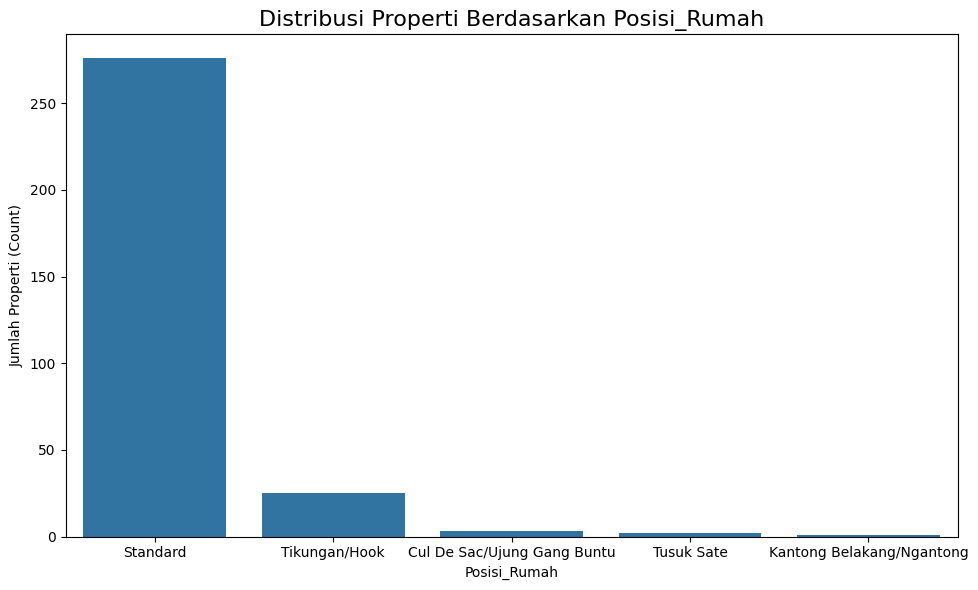

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Posisi_Rumah',
    order = df['Posisi_Rumah'].value_counts().index
)

plt.title('Distribusi Properti Berdasarkan Posisi_Rumah', fontsize=16)
plt.xlabel('Posisi_Rumah')
plt.ylabel('Jumlah Properti (Count)')
plt.tight_layout()

### Interpretation
 Mayoritas properti yang dijual (lebih dari 250 properti) berada di posisi Standard. Sedangkan posisi-posisi lain berjumlah tidak lebih dari 50 masing-masing. Bisa dilihat dari sini bahwa paling banyak rumah berada di posisi "STANDARD"

## Data Transformation

In [14]:
# duplicate df
df_encoded = df.copy()
from sklearn.preprocessing import OrdinalEncoder

# Nominal Encoding
nominal_cols = ['Category', 'Daerah', 'Arah_Rumah', 'Posisi_Rumah', 'ROW']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Arah_Rumah': {'Barat': 0, 'Selatan': 1, 'Timur': 2, 'Utara': 3},
 'Category': {'Below Standard': 0,
              'Premium': 1,
              'Sangat Premium': 2,
              'Standard': 3},
 'Daerah': {'anjasmoro': 0,
            'araya': 1,
            'asemrowo': 2,
            'babatan': 3,
            'babatan pantai': 4,
            'baratajaya': 5,
            'bendul merisi': 6,
            'bratang gede': 7,
            'bubutan': 8,
            'bulak cumpat barat': 9,
            'ciliwung': 10,
            'citraland': 11,
            'citraland golf avenue': 12,
            'citraland utara': 13,
            'darmahusada': 14,
            'darmo': 15,
            'darmo permai': 16,
            'diponegoro': 17,
            'dukuh pakis': 18,
            'dukuh sutorejo': 19,
            'gading': 20,
            'gading indah regency': 21,
            'galaxy bumi permai': 22,
            'gayungan': 23,
            'gayungsari': 24,
            'graha': 25,
         

,Category,Daerah,Luas_Tanah,Luas_Bangunan,Kamar,Kamar_Mandi,Lantai,Harga,Arah_Rumah,Posisi_Rumah,ROW
199,3.0,100.0,160,160,4,3,1,2100000000,3.0,2.0,0.0
185,1.0,11.0,280,425,5,5,2,4950000000,2.0,2.0,0.0
73,1.0,80.0,240,300,5,5,2,4888888888,2.0,3.0,0.0
267,1.0,23.0,92,150,4,3,2,2200000000,1.0,3.0,2.0
273,2.0,15.0,580,1100,6,8,2,19000000000,3.0,3.0,0.0


In [15]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Luas_Tanah', 'Luas_Bangunan', 'Kamar','Kamar_Mandi', 'Lantai', 'Harga']])
df_scaled = pd.DataFrame(df_scaled, columns=['Luas_Tanah', 'Luas_Bangunan', 'Kamar','Kamar_Mandi', 'Lantai', 'Harga'])
df_scaled.head()

,Luas_Tanah,Luas_Bangunan,Kamar,Kamar_Mandi,Lantai,Harga
0,0.063554,0.155573,-0.168442,-0.208200,0.314283,-0.183126
1,-0.977168,-0.970421,-1.385188,-1.437381,0.314283,-0.569654
2,-0.283353,-0.454340,0.439931,0.406390,0.314283,-0.279391
3,-0.199105,-0.079009,0.439931,1.020981,0.314283,-0.231258
4,0.608694,1.563066,0.439931,1.020981,0.314283,-0.002628


In [16]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas_Tanah,Luas_Bangunan,Kamar,Kamar_Mandi,Lantai,Harga
count,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02
mean,-5.207561e-17,-3.182398e-17,1.851577e-16,-1.128305e-16,1.793715e-16,1.301890e-17
std,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00
min,-1.056461e+00,-1.186237e+00,-1.993561e+00,-1.437381e+00,-1.654798e+00,-5.850326e-01
25%,-6.500841e-01,-6.889226e-01,-7.768151e-01,-8.227903e-01,3.142834e-01,-4.358216e-01
50%,-3.180442e-01,-3.135912e-01,-1.684420e-01,-2.082000e-01,3.142834e-01,-2.793907e-01
75%,2.915217e-01,3.080514e-01,4.399310e-01,4.063903e-01,3.142834e-01,-1.533006e-02
max,6.610192e+00,4.378051e+00,5.306915e+00,5.937703e+00,4.252447e+00,1.130853e+01


## Silhouette Score

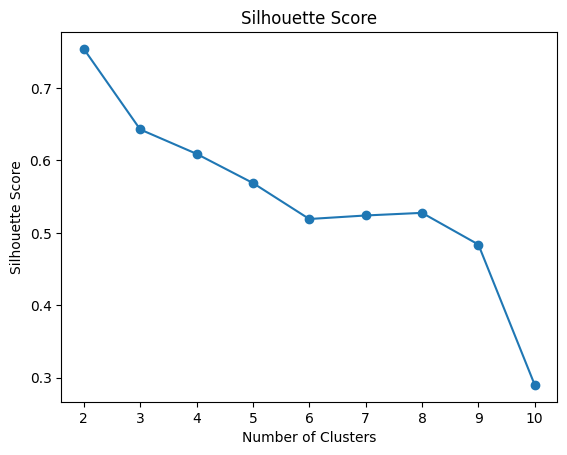

In [17]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Jumlah cluster optimal untuk data ini adalah 2.
Ini menjelaskan bahwa ada dua kelompok alami yang berbeda dalam dataset.

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


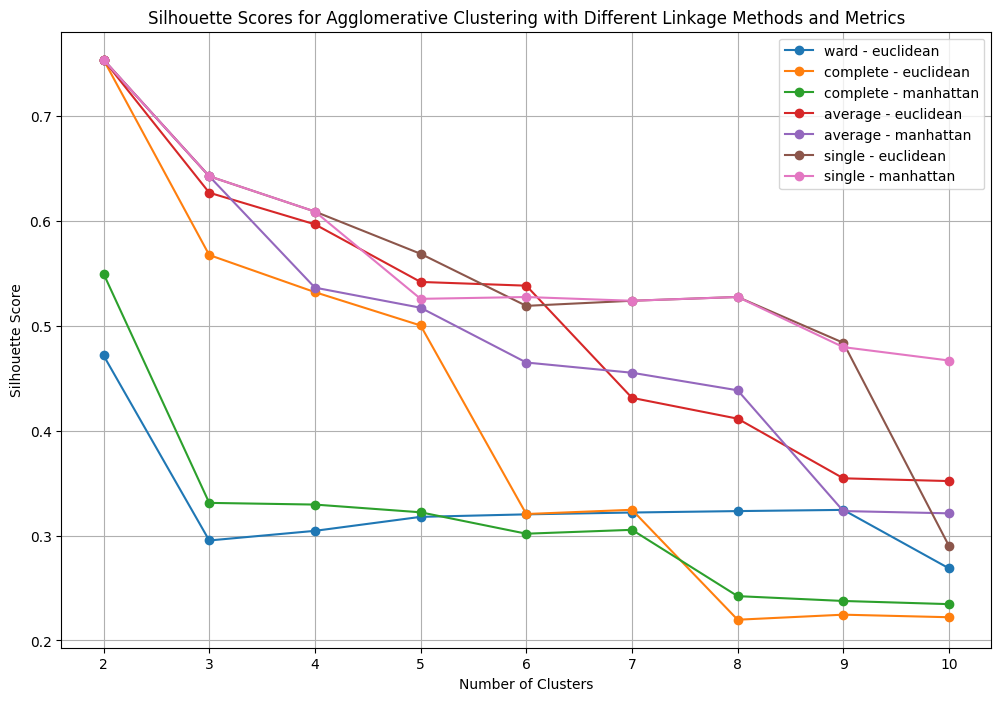

Best Silhouette Score: 0.753866298054341
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [18]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Hierarchical Clustering Model

In [19]:
# Hierarchical Clustering "Complete"
agglo_C = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_C = agglo_C.fit_predict(df_scaled)

# Hierarchical Clustering "Ward"
agglo_W = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric=best_metric)
y_W = agglo_W.fit_predict(df_scaled)

In [20]:
# Evaluation
ss_C = silhouette_score(df_scaled, y_C)
print(ss_C)
ss_W = silhouette_score(df_scaled, y_W)
print(ss_W)

0.753866298054341
0.47177926756374905


## Dendogram Visualization for Hierarchical Clustering Model

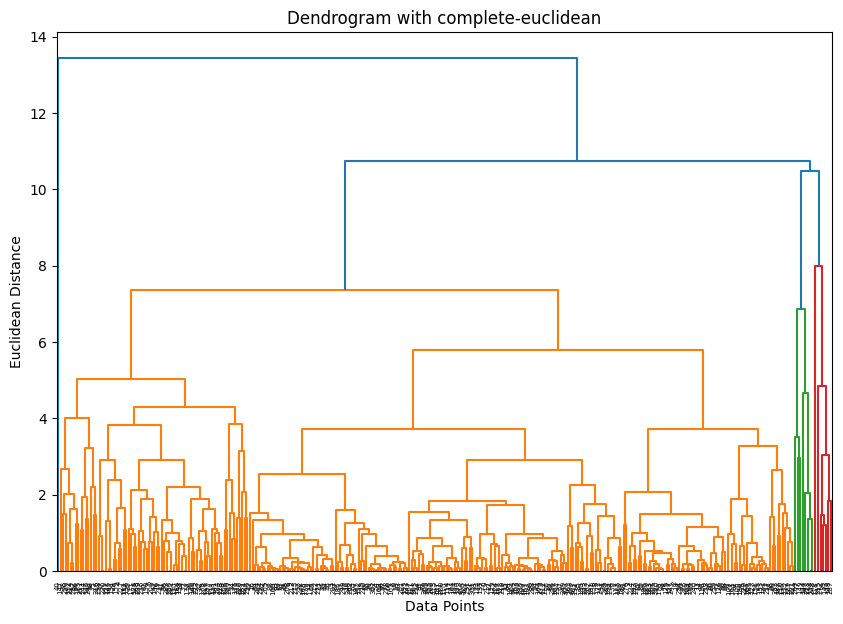

In [22]:
import scipy.cluster.hierarchy as sch
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

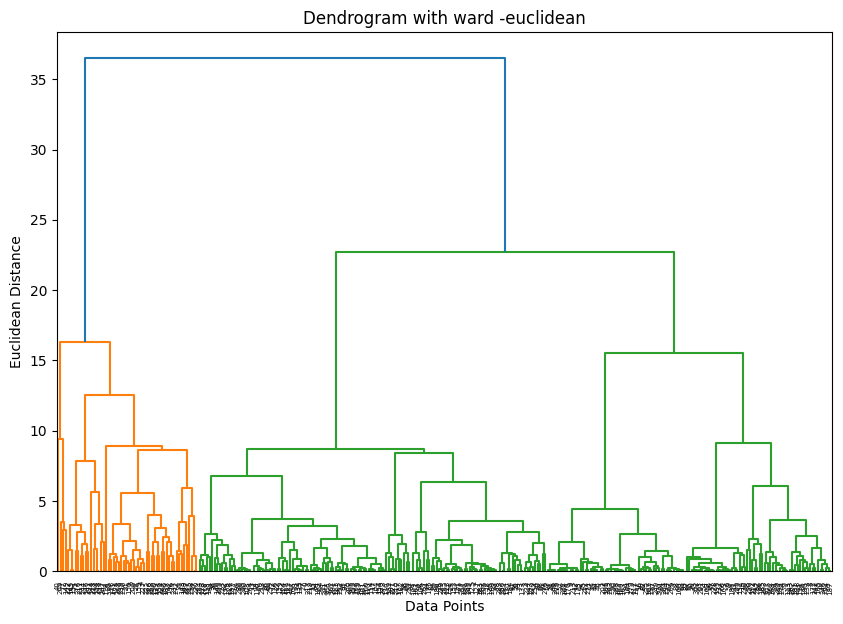

In [ ]:
wlinkage = 'ward'
# Average Distance
linked = linkage(df_scaled, method=wlinkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with ward-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [ ]:
# Add the cluster labels to the original data
df['Agglo_C'] = y_C
df['Agglo_W'] = y_W
# Analyze the clusters with the original values
df.head()

,Category,Daerah,Luas_Tanah,Luas_Bangunan,Kamar,Kamar_Mandi,Lantai,Harga,Arah_Rumah,Posisi_Rumah,ROW,Agglo_C,Agglo_W
0,Standard,citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil,0,0
1,Below Standard,setro baru utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil,0,0
2,Standard,kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0,0
3,Sangat Premium,kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil,0,0
4,Premium,kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil,0,1


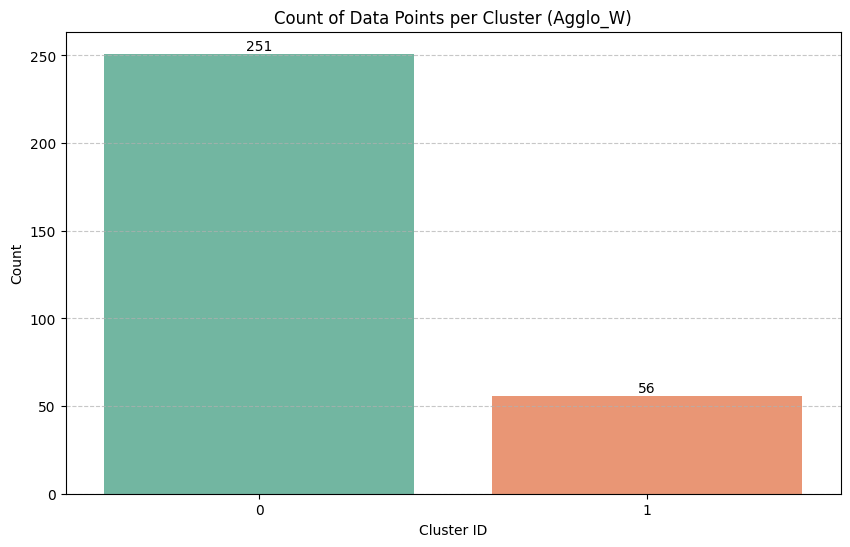

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo_W'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo_W)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

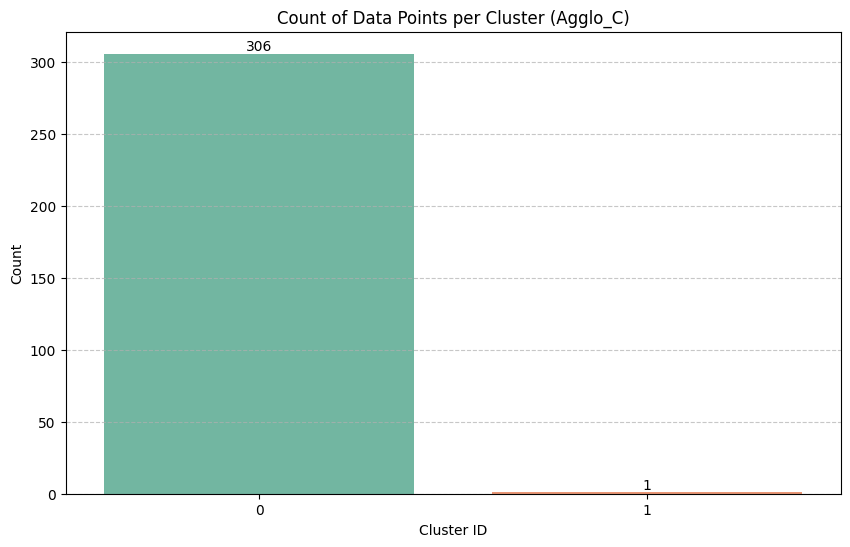

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo_C'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo_C)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the distribution of data points per cluster, we can see that when we use "ward" the distribution is 251 to 56 while if we use "complete" the distribution is 306 to 1

## Statistical Summary for each cluster

In [ ]:
agg_rules = { 
    'Harga': ['mean', 'std', 'min', 'max'],
    'Luas_Bangunan': ['mean', 'std', 'min', 'max'],
    'Posisi_Rumah': ['first', 'count'], 
    'Category': ['first', 'count'], 
    'Daerah': ['first', 'count'], 
    'Posisi_Rumah': ['first', 'count'], 
    'Arah_Rumah': ['first', 'count'], 
    'ROW': ['first', 'count'], 
    'Kamar_Mandi': ['mean', 'std', 'min', 'max'],
    'Kamar': ['mean', 'std', 'min', 'max'],
    'Luas_Tanah': ['mean', 'std', 'min', 'max', 'size'] 
}
print("--- Ringkasan Cluster: Model 'Complete' (Skor 0.753) ---")
cluster_summary_C = df.groupby('Agglo_C').agg(agg_rules)
cluster_summary_C = cluster_summary_C.rename(columns={'first': 'Example_Posisi'}, level=1)
display(cluster_summary_C)


print("\n--- Ringkasan Cluster: Model 'Ward' (Skor 0.471) ---")
cluster_summary_W = df.groupby('Agglo_W').agg(agg_rules)
cluster_summary_W = cluster_summary_W.rename(columns={'first': 'Example_Posisi'}, level=1)
display(cluster_summary_W)

--- Ringkasan Cluster: Model 'Complete' (Skor 0.753) ---


Harga                                         Luas_Bangunan  \
                 mean           std          min          max          mean   
Agglo_C                                                                       
0        4.714725e+09  6.361103e+09    160000000  58000000000    265.751634   
1        9.900000e+10           NaN  99000000000  99000000000    600.000000   

                                 Posisi_Rumah        ... Kamar_Mandi  \
                std  min   max Example_Posisi count  ...         max   
Agglo_C                                              ...               
0        212.987286   14  1200       Standard   306  ...          13   
1               NaN  600   600       Standard     1  ...           5   

            Kamar                    Luas_Tanah                              
             mean       std min max        mean         std  min   max size  
Agglo_C                                                                      
0        4.267974  1.641697   1  13  225.957516  201.311035   14  1561  306  
1        7.000000       NaN   7   7  600.000000         NaN  600   600    1  

[2 rows x 31 columns]


--- Ringkasan Cluster: Model 'Ward' (Skor 0.471) ---


Harga                                        Luas_Bangunan  \
                 mean           std         min          max          mean   
Agglo_W                                                                      
0        2.628250e+09  2.050970e+09   160000000  13500000000    187.776892   
1        1.575027e+10  1.493437e+10  2750000000  99000000000    621.214286   

                                 Posisi_Rumah        ... Kamar_Mandi  \
                std  min   max Example_Posisi count  ...         max   
Agglo_W                                              ...               
0        107.036321   14   570       Standard   251  ...           7   
1        212.411240  300  1200       Standard    56  ...          13   

            Kamar                    Luas_Tanah                              
             mean       std min max        mean         std  min   max size  
Agglo_W                                                                      
0        3.852590  1.343943   1   9  155.848606   93.452239   14   525  251  
1        6.178571  1.538679   3  13  546.875000  245.541632  240  1561   56  

[2 rows x 31 columns]

Meskipun Model "Complete" memenangkan secara matematika (skor tertinggi), Model "Ward" memenangkan analisis bisnis (segmentasi bermakna).

Ini karena Model "Ward" (dengan skor 0.471 yang lebih rendah) sebenarnya telah melakukan pekerjaan yang jauh lebih baik dalam segmentasi yang sesungguhnya yaitu membagi dan dapat ditindaklanjuti dan dianalisa.

## Implikasi Manajerial Berdasarkan Hasil Clustering Properti - WARD

### Cluster 0 (n=251) — Pasar Utama: Properti Standar & Efisien
Profil: Harga Rata-rata: 2 Miliar | Luas Bangunan Rata-rata: 187 m² | Kamar Rata-rata: 3 

Makna: Ini adalah inti pasar (bread-and-butter). Segmen ini mewakili mayoritas properti. Pembeli di segmen ini kemungkinan besar sensitif terhadap harga dan mencari fungsionalitas serta "nilai terbaik" (value for money). Mereka mencari rumah yang praktis untuk kebutuhan keluarga.

Strategi:

Strategi Harga: Gunakan Competitive Pricing. Tampilkan harga secara transparan dan tawarkan promosi KPR atau diskon DP untuk menarik volume. Fokus pada "harga per meter persegi" yang kompetitif.

Strategi Pemasaran: Gunakan pemasaran massal. Pasang iklan secara agresif di portal properti besar (Rumah123, Lamudi), gunakan social media ads dengan target audiens yang luas (misal: "keluarga muda").

Fokus Penjualan: Latih agen untuk menyoroti fitur-fitur praktis: jumlah kamar, efisiensi tata ruang, akses jalan (ROW), dan kedekatan dengan fasilitas umum (sekolah, pasar).

Fokus KPI:

- Volume Penjualan (Jumlah unit terjual)

- Kecepatan Penjualan (Days on Market / Waktu yang dibutuhkan untuk terjual)

- Conversion Rate (Persentase dari kunjungan/leads menjadi penjualan)

### Cluster 1 (n=56) — Pasar Niche: Properti Mewah & Premium
Profil: Harga Rata-rata: 14.9 Miliar | Luas Bangunan Rata-rata: 621 m² | Kamar Rata-rata: 6 

Makna: Ini adalah segmen premium/mewah. Volumenya rendah, tetapi margin per unitnya sangat tinggi. Pembeli di segmen ini jauh lebih tidak sensitif terhadap harga. mereka membeli lokasi, prestise, ukuran, dan keunikan.

Strategi:

Strategi Harga: Gunakan Value-Based Pricing atau Prestige Pricing. Harga tidak harus dinegosiasikan. Fokus pada keunikan properti (desain arsitektur, Luas_Tanah yang besar, lokasi premium).

Strategi Pemasaran: Pemasaran yang sangat tertarget dan personal. Gunakan agen properti premium, pemasaran dari mulut ke mulut (referral), dan event eksklusif (misal: private viewing). Hindari pemasaran massal yang "murah".

Fokus Penjualan: Latih agen untuk membangun hubungan (relationship building). Fokus pada "gaya hidup" yang ditawarkan, bukan hanya bangunan. Tunjukkan Posisi_Rumah ('Hook'), Daerah elit, dan kemewahan material.

Fokus KPI:

- Margin per Unit (Keuntungan per penjualan)

- Rata-rata Harga Jual (Average Selling Price)

- Customer Lifetime Value (Jika pembeli adalah investor yang mungkin membeli lagi)

#### Rekomendasi Umum
- Segmentasi Tim Penjualan (Sales):

Tim A (Cluster 0): Fokus pada kecepatan, volume, dan proses KPR yang efisien.

Tim B (Cluster 1): Fokus pada layanan personal, high-touch, dan negosiasi berbasis nilai, bukan diskon.

- Strategi Alokasi Pemasaran:

Anggaran Massal (Cluster 0): Alokasikan sebagian besar anggaran untuk iklan digital dan portal properti guna menjangkau 251 prospek.

Anggaran Eksklusif (Cluster 1): Alokasikan anggaran khusus untuk materi pemasaran berkualitas tinggi (video sinematik, brosur mewah) dan networking event untuk menjangkau 56 prospek.

- Pengembangan Produk (Jika Anda Developer):

Untuk Cluster 0: Fokus pada standardisasi dan efisiensi biaya produksi untuk menjaga harga tetap kompetitif.

Untuk Cluster 1: Fokus pada kustomisasi, material premium, dan arsitek ternama. Tawarkan kavling yang lebih besar.

- Monitoring:

Selalu pantau rata-rata harga dan luas di kedua cluster ini setiap kuartal.

Perhatikan jika ada properti dari Cluster 0 yang harganya naik hingga masuk ke rentang Cluster 1 (indikasi gentrifikasi atau renovasi besar-besaran).